In [13]:
import os
import torch

# Make only GPU 0 visible
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# After setting environment variable, import torch and select device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Using device:", device)

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Available GPUs:", torch.cuda.device_count())
    print("Current device ID:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA not available, using CPU.")

Using device: cuda:0
GPU Name: NVIDIA A100-PCIE-40GB
Available GPUs: 1
Current device ID: 0
Device name: NVIDIA A100-PCIE-40GB


In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("ESM2_embeddings.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,Target
0,0.130435,0.011370,0.063458,0.012011,-0.127296,-0.039671,-0.236100,0.412195,-0.046157,0.017493,...,-0.034519,-0.124923,0.080610,0.154233,-0.077860,0.069268,0.175894,0.047450,0.016773,1
1,0.114081,0.023153,0.069689,-0.030750,-0.146010,-0.007644,-0.266376,0.338079,-0.117704,0.053129,...,-0.047833,-0.163833,0.140615,0.114252,-0.068570,0.055187,0.220603,0.060222,0.036554,1
2,0.036842,-0.068799,-0.166281,0.038315,0.219728,-0.010635,0.014208,0.082148,-0.050451,-0.017208,...,-0.158717,0.009559,0.037974,0.005171,-0.079823,0.031614,-0.047762,-0.061982,-0.027813,1
3,-0.003241,-0.058510,-0.214218,-0.025746,0.150160,-0.030416,-0.041169,0.088618,-0.129555,-0.021503,...,-0.180323,-0.004139,0.083308,0.030012,0.079788,0.183898,0.001547,-0.043329,-0.054641,1
4,0.001161,-0.063855,-0.194184,-0.057425,0.133597,-0.032427,-0.000813,0.108597,-0.103443,-0.036455,...,-0.166054,-0.008018,0.053516,0.034130,0.090065,0.170062,0.000123,-0.053155,-0.028928,1


In [16]:
X = df.drop("Target",axis=1)
y = df["Target"]
X,y

(             0         1         2         3         4         5         6  \
 0     0.130435  0.011370  0.063458  0.012011 -0.127296 -0.039671 -0.236100   
 1     0.114081  0.023153  0.069689 -0.030750 -0.146010 -0.007644 -0.266376   
 2     0.036842 -0.068799 -0.166281  0.038315  0.219728 -0.010635  0.014208   
 3    -0.003241 -0.058510 -0.214218 -0.025746  0.150160 -0.030416 -0.041169   
 4     0.001161 -0.063855 -0.194184 -0.057425  0.133597 -0.032427 -0.000813   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1308  0.038687 -0.036308 -0.131420  0.031190  0.075919  0.056670 -0.028150   
 1309  0.053200 -0.045348  0.006086  0.027891 -0.042301  0.063838  0.021975   
 1310  0.123872 -0.027290  0.064946  0.061318  0.076863 -0.038074 -0.008503   
 1311  0.047372 -0.042332 -0.064850  0.102599  0.019164 -0.093107 -0.055846   
 1312 -0.027386 -0.002035 -0.046440  0.075812  0.044770  0.023208 -0.104773   
 
              7         8         9  ...      1270

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, X_val.shape

((919, 1280), (354, 1280), (40, 1280))

--- Running Logistic Regression ---
Starting hyperparameter tuning...
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9096
2. Specificity (SP): 0.9087
3. Precision (PRE): 0.8601
4. Sensitivity/Recall: 0.9111
5. F1 Score (F1): 0.8849
6. Matthews Correlation Coefficient (MCC): 0.8115
7. Area Under the Curve (AUC): 0.9525


--- Running Random Forest ---
Starting hyperparameter tuning...
Best hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9662


--- Running Gaussian Naive Bayes ---
Starting hyperparameter tuning...
Best hyperparameters: {'var_smoothi

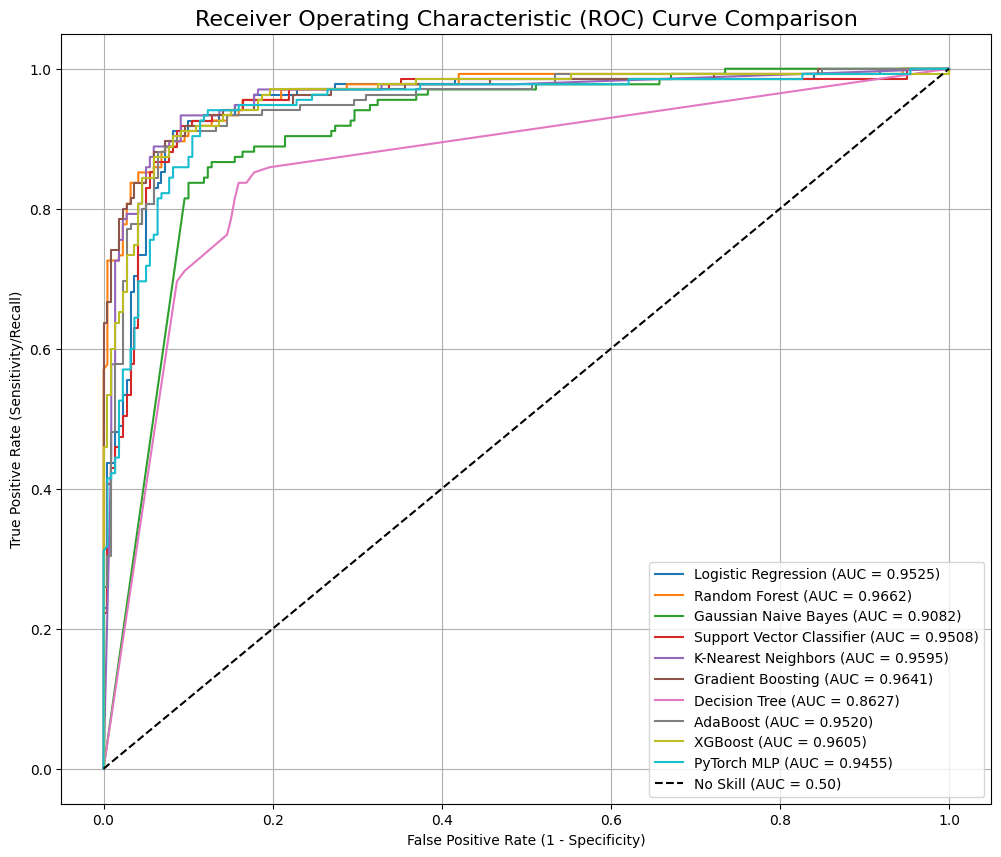

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# ----- 1. Define the PyTorch MLP and Scikit-learn Wrapper -----

# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            # Use 1 output for binary classification, num_classes for multi-class
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model_ = None

    def fit(self, X, y):
        # Convert numpy arrays to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)

        # Define loss and optimizer
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)

        # Training loop
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                # Adjust target shape and type for binary vs multi-class
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                # Return probabilities for both classes [P(0), P(1)]
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

    def score(self, X, y):
        preds = self.predict(X)
        return accuracy_score(y, preds)



# ----- 3. Model Definitions and Hyperparameter Grids -----
models_to_run = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=5000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet', None],
            'solver': ['liblinear', 'lbfgs', 'saga'],
            'class_weight': [None, 'balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(-9, -6, 4)
        }
    },
    'Support Vector Classifier': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4],  # only for poly kernel
            'class_weight': [None, 'balanced']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'manhattan', 'euclidean'],
            'p': [1, 2]  # power parameter for Minkowski
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(
            random_state=42, 
            use_label_encoder=False, 
            eval_metric='logloss'
        ),
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7, 10],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2, 0.5],
            'min_child_weight': [1, 3, 5]
        }
    }
    ,
    'PyTorch MLP': {
        'model': TorchMLPClassifier(input_dim=X_train.shape[1], num_classes=len(np.unique(y_train))),
        'params': {
            "hidden_dim": [64 ,128, 256, 512],
            "dropout": [0.01, 0.1, 0.3, 0.5],
            "lr": [1e-2,1e-3, 1e-4],
            "batch_size": [16,32, 64],
            "epochs": [20, 30, 50, 100]
        }
    }
}


# ----- 4. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))

for name, config in models_to_run.items():
    print(f"--- Running {name} ---")
    
    print("Starting hyperparameter tuning...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='roc_auc',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    # Ensure data is in the correct format (numpy array)
    grid_search.fit(np.array(X_train), np.array(y_train))
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")
    
    y_pred = best_model.predict(np.array(X_test))
    y_pred_proba = best_model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")
    

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')
    
    print("\n" + "="*50 + "\n")

# ----- 5. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Running Logistic Regression ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9096
2. Specificity (SP): 0.9087
3. Precision (PRE): 0.8601
4. Sensitivity/Recall: 0.9111
5. F1 Score (F1): 0.8849
6. Matthews Correlation Coefficient (MCC): 0.8115
7. Area Under the Curve (AUC): 0.9525


--- Running Random Forest ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9662


--- Running Support Vector Classifier ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9087
3. Precision (PRE): 0.8611
4. Sensitivity/Recall: 0.9185
5. F1 Score (F1): 0.8889
6. Matthews Correlation Coefficient (MCC): 0.8179
7. Area Under the Curve (AUC): 0.9508


--- Running K-Nearest Neighbors ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9269
3. Precision

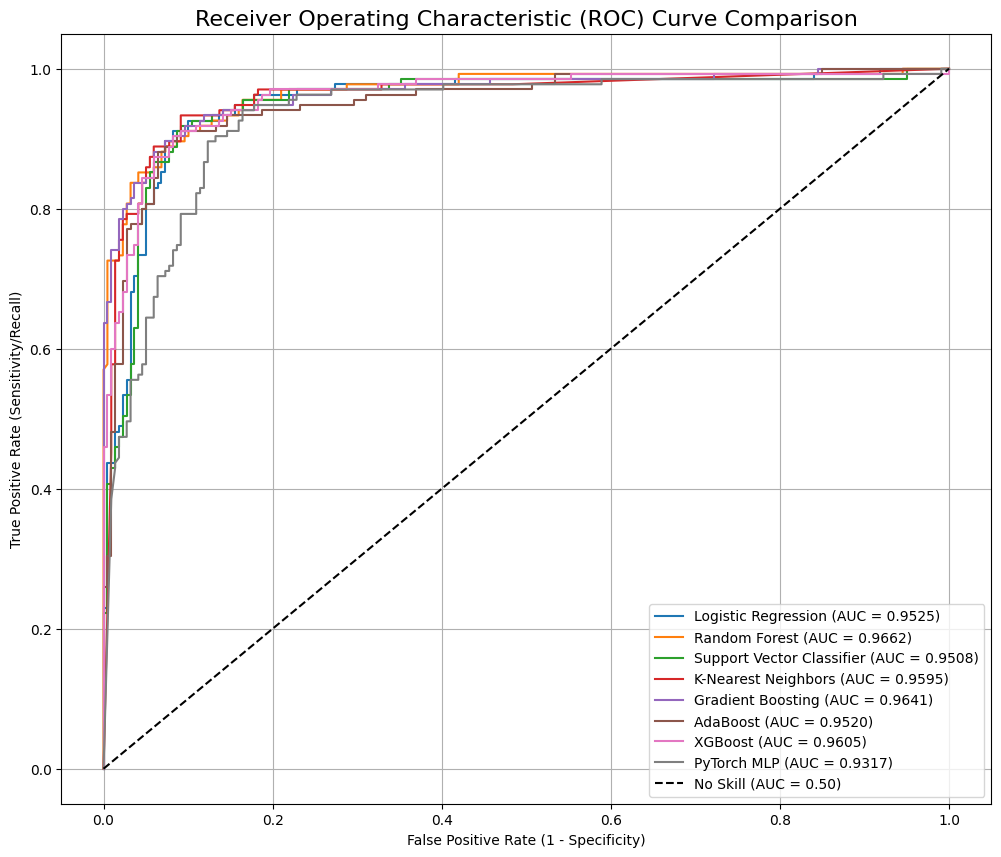

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# ----- 1. Define the PyTorch MLP and Scikit-learn Wrapper -----

# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            # Use 1 output for binary classification, num_classes for multi-class
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model_ = None

    def fit(self, X, y):
        # Convert numpy arrays to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)

        # Define loss and optimizer
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)

        # Training loop
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                # Adjust target shape and type for binary vs multi-class
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                # Return probabilities for both classes [P(0), P(1)]
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

    def score(self, X, y):
        preds = self.predict(X)
        return accuracy_score(y, preds)


# ----- 3. Model Definitions with Best Hyperparameters -----
# The models are instantiated with the optimal parameters you found.
best_models = {
    'Logistic Regression': LogisticRegression(
        C=10, class_weight='balanced', penalty='l2', solver='liblinear',
        random_state=42, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        bootstrap=False, max_depth=20, max_features='sqrt',
        min_samples_leaf=2, min_samples_split=2, n_estimators=500,
        random_state=42
    ),
    'Support Vector Classifier': SVC(
        C=100, class_weight='balanced', degree=2, gamma='scale', kernel='rbf',
        probability=True, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        metric='minkowski', n_neighbors=15, p=2, weights='distance'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=7, max_features='log2',
        min_samples_leaf=4, min_samples_split=10, n_estimators=100,
        subsample=1.0, random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        algorithm='SAMME', learning_rate=1.0, n_estimators=500, random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5,
        min_child_weight=3, n_estimators=100, subsample=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    'PyTorch MLP': TorchMLPClassifier(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        batch_size=16, dropout=0.01, epochs=20, hidden_dim=64, lr=0.01
    )
}



# ----- 4. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))

for name, model in best_models.items():
    print(f"--- Running {name} ---")

    # Fit the model
    model.fit(np.array(X_train), np.array(y_train))

    # Get predictions
    y_pred = model.predict(np.array(X_test))
    y_pred_proba = model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

    print("\n" + "="*50 + "\n")

# ----- 5. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Running Logistic Regression ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9096
2. Specificity (SP): 0.9087
3. Precision (PRE): 0.8601
4. Sensitivity/Recall: 0.9111
5. F1 Score (F1): 0.8849
6. Matthews Correlation Coefficient (MCC): 0.8115
7. Area Under the Curve (AUC): 0.9528


--- Running Random Forest ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9662


--- Running Support Vector Classifier ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.8955
2. Specificity (SP): 0.9041
3. Precision (PRE): 0.8500
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8655
6. Matthews Correlation Coefficient (MCC): 0.7804
7. Area Under the Curve (AUC): 0.9532


--- Running K-Nearest Neighbors ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9040
2. Specificity (SP): 0.9224
3. Precision

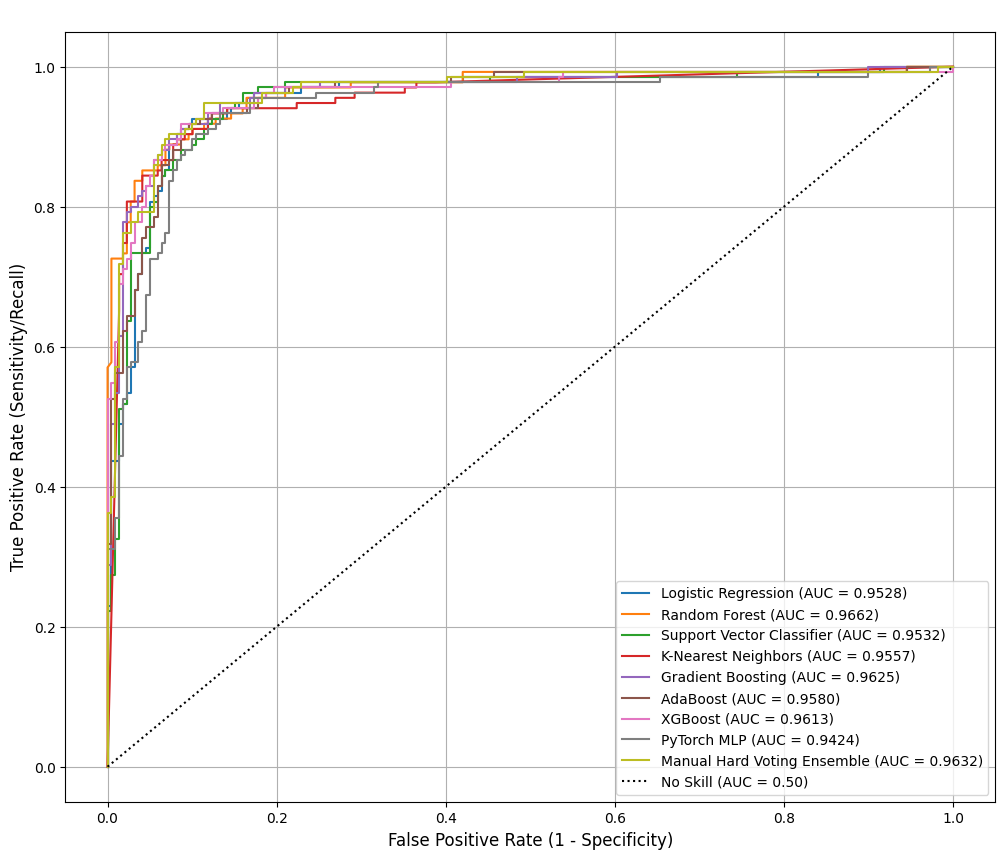

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
# CHANGED: Added pickle for saving models
import pickle

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# ----- 2. Define the PyTorch MLP and Scikit-learn Wrapper -----
# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model_ = None
        self.classes_ = np.arange(num_classes)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

# ----- 3. Manually Create a Hard Voting Ensemble Classifier -----
class ManualHardVotingClassifier(BaseEstimator, ClassifierMixin):
    """A custom hard-voting ensemble classifier."""
    def __init__(self, estimators):
        # estimators is a list of tuples: [('name1', model1), ('name2', model2), ...]
        self.estimators = estimators
        self.named_estimators_ = dict(estimators)
        self.le_ = LabelEncoder()

    def fit(self, X, y):
        """Train all base estimators on the training data."""
        self.le_.fit(y)
        self.classes_ = self.le_.classes_

        # Create a clean, fitted copy of each estimator
        self.estimators_ = []
        for _, estimator in self.estimators:
            fitted_estimator = clone(estimator).fit(X, y)
            self.estimators_.append(fitted_estimator)
        return self

    def predict(self, X):
        """
        Predict class labels by majority rule (hard voting).
        """
        # 1. Get predictions from each individual fitted model
        predictions = np.asarray([est.predict(X) for est in self.estimators_]).T

        # 2. For each sample, find the most frequent prediction (the mode)
        #    This is the core of hard voting.
        majority_vote = mode(predictions, axis=1, keepdims=False)[0]
        return majority_vote

    def predict_proba(self, X):
        """
        Average the probabilities of the base estimators.
        This is required for calculating the ROC AUC score.
        """
        # Collect probabilities from all estimators that support it
        all_probas = [
            est.predict_proba(X) for est in self.estimators_
            if hasattr(est, 'predict_proba')
        ]
        
        if not all_probas:
            raise AttributeError("None of the base estimators support predict_proba.")

        # Average the probabilities across all models
        avg_proba = np.mean(all_probas, axis=0)
        return avg_proba

# ----- 4. Model Definitions -----
# We will use this dictionary to instantiate both individual models and the ensemble
base_models = {
    'Logistic Regression': LogisticRegression(
        C=10, class_weight='balanced', penalty='l2', solver='lbfgs',
        random_state=42, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        bootstrap=False, max_depth=20, max_features='sqrt',
        min_samples_leaf=2, min_samples_split=2, n_estimators=500,
        random_state=42
    ),
    'Support Vector Classifier': SVC(
        C=10, class_weight='balanced', degree=2, gamma='scale', kernel='rbf',
        probability=True, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        metric='minkowski', n_neighbors=9, p=1, weights='distance'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=3, max_features='log2',
        min_samples_leaf=2, min_samples_split=5, n_estimators=500,
        subsample=0.8, random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        learning_rate=0.1, n_estimators=500, random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7,
        min_child_weight=1, n_estimators=500, subsample=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    'PyTorch MLP': TorchMLPClassifier(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        batch_size=16, dropout=0.01, epochs=20, hidden_dim=64, lr=0.01
    )
}
# Create the manual ensemble using the models defined above
manual_ensemble = ManualHardVotingClassifier(estimators=list(base_models.items()))

# Combine all models to be evaluated into a single dictionary
models_to_run = base_models.copy()
models_to_run['Manual Hard Voting Ensemble'] = manual_ensemble


# ----- 5. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))


# Create an empty list to store metrics for each model
results = []

for name, model in models_to_run.items():
    print(f"--- Running {name} ---")

    # Fit the model
    model.fit(np.array(X_train), np.array(y_train))

    # Get predictions
    y_pred = model.predict(np.array(X_test))
    y_pred_proba = model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")

    # Save metrics to list
    results.append({
        'Model': name,
        'Accuracy (ACC)': round(accuracy, 4),
        'Specificity (SP)': round(specificity, 4),
        'Precision (PRE)': round(precision, 4),
        'Sensitivity/Recall': round(sensitivity, 4),
        'F1 Score (F1)': round(f1, 4),
        'Matthews CorrCoef (MCC)': round(mcc, 4),
        'Area Under Curve (AUC)': round(auc, 4)
    })

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

    print("\n" + "="*50 + "\n")

# ----- 5. Create DataFrame and Save to Excel -----
df_results = pd.DataFrame(results)
df_results.to_csv("model_performance_ESM.csv", index=False)

print("✅ Model performance metrics saved to 'model_performance.xlsx'")

# ----- 6. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k:', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title(" ")
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC_curve_for_ESM2_model.png",dpi = 300)
plt.show()

In [21]:
# ----- 7. Save All Trained Models to Disk -----
# CHANGED: Added this new section to pickle every trained model.
print("--- Saving Trained Models ---")
for name, model in models_to_run.items():
    # Sanitize the model name to create a valid filename
    filename = f"./ESM_models/{name.lower().replace(' ', '_')}_model_ESM.pkl"
    
    try:
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Successfully saved '{name}' to '{filename}'")
    except Exception as e:
        print(f"Error saving '{name}': {e}")

print("\nAll models have been saved.")

--- Saving Trained Models ---
Successfully saved 'Logistic Regression' to './ESM_models/logistic_regression_model_ESM.pkl'
Successfully saved 'Random Forest' to './ESM_models/random_forest_model_ESM.pkl'
Successfully saved 'Support Vector Classifier' to './ESM_models/support_vector_classifier_model_ESM.pkl'
Successfully saved 'K-Nearest Neighbors' to './ESM_models/k-nearest_neighbors_model_ESM.pkl'
Successfully saved 'Gradient Boosting' to './ESM_models/gradient_boosting_model_ESM.pkl'
Successfully saved 'AdaBoost' to './ESM_models/adaboost_model_ESM.pkl'
Successfully saved 'XGBoost' to './ESM_models/xgboost_model_ESM.pkl'
Successfully saved 'PyTorch MLP' to './ESM_models/pytorch_mlp_model_ESM.pkl'
Successfully saved 'Manual Hard Voting Ensemble' to './ESM_models/manual_hard_voting_ensemble_model_ESM.pkl'

All models have been saved.


Models loaded successfully :  k-nearest_neighbors_model_ESM.pkl
1. Accuracy (ACC): 0.9250
2. Specificity (SP): 0.9361
3. Precision (PRE): 0.8947
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8881
6. Matthews Correlation Coefficient (MCC): 0.8199
7. Area Under the Curve (AUC): 0.9632





Models loaded successfully :  pytorch_mlp_model_ESM.pkl
1. Accuracy (ACC): 0.8750
2. Specificity (SP): 0.9361
3. Precision (PRE): 0.8947
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8881
6. Matthews Correlation Coefficient (MCC): 0.8199
7. Area Under the Curve (AUC): 0.9632





Models loaded successfully :  xgboost_model_ESM.pkl
1. Accuracy (ACC): 0.9250
2. Specificity (SP): 0.9361
3. Precision (PRE): 0.8947
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8881
6. Matthews Correlation Coefficient (MCC): 0.8199
7. Area Under the Curve (AUC): 0.9632





Models loaded successfully :  logistic_regression_model_ESM.pkl
1. Accuracy (ACC): 0.9000
2. Specificity (SP): 0.9361
3. Precision (PRE): 0.8

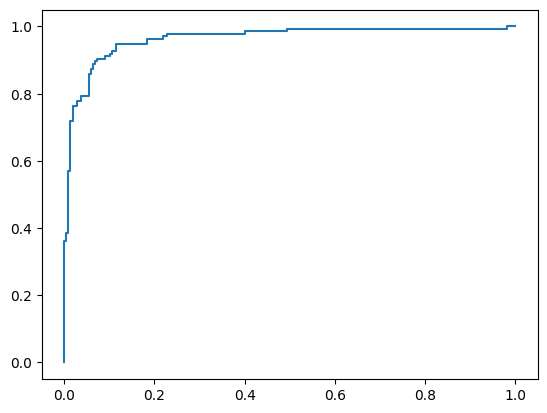

In [50]:
import os
val_results = []
for m_model in os.listdir("./ESM_models/"):
    if m_model!=".ipynb_checkpoints":
        with open(f"./ESM_models/{m_model}", 'rb') as f:
                    model = pickle.load(f)
        print("Models loaded successfully : ",m_model)
        y_val_pred = model.predict(np.array(X_val))
        accuracy = accuracy_score(y_val, y_val_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        precision = report.get('1', {}).get('precision', 0)
        sensitivity = report.get('1', {}).get('recall', 0) # Same as recall
        f1 = report.get('1', {}).get('f1-score', 0)
        mcc = matthews_corrcoef(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Print metrics
        print(f"1. Accuracy (ACC): {accuracy:.4f}")
        print(f"2. Specificity (SP): {specificity:.4f}")
        print(f"3. Precision (PRE): {precision:.4f}")
        print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
        print(f"5. F1 Score (F1): {f1:.4f}")
        print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
        print(f"7. Area Under the Curve (AUC): {auc:.4f}")
        print("\n\n")
        # Save metrics to list
        val_results.append({
            'Model': name,
            'Accuracy (ACC)': round(accuracy, 4),
            'Specificity (SP)': round(specificity, 4),
            'Precision (PRE)': round(precision, 4),
            'Sensitivity/Recall': round(sensitivity, 4),
            'F1 Score (F1)': round(f1, 4),
            'Matthews CorrCoef (MCC)': round(mcc, 4),
            'Area Under Curve (AUC)': round(auc, 4)
        })
    
      
    
        print("\n" + "="*50 + "\n")

# ----- 5. Create DataFrame and Save to Excel -----
df_results = pd.DataFrame(val_results)
df_results.to_csv("Validation_model_performance_ESM.csv", index=False)

  # Add ROC curve to plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

In [36]:
import pickle
import numpy as np
import torch
import torch.nn as nn
from transformers import EsmModel, EsmTokenizer # Changed from BertModel/Tokenizer
from scipy.stats import mode
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
import os
import warnings

# This line targets and ignores the specific warning message
warnings.filterwarnings("ignore", "Some weights of EsmModel were not initialized from the model checkpoint")


# --- 1. Required Class Definitions for Unpickling ---
# These class definitions are necessary for pickle to load your custom
# scikit-learn compatible classifier. They do not need to be changed.

# A. PyTorch Model and Wrapper Definitions
class Classifier(nn.Module):
    """Core PyTorch model definition."""
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    """Scikit-learn style wrapper for the PyTorch model."""
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        # ... (rest of __init__ is not essential for prediction)

    # Only predict/predict_proba are needed for inference.
    def predict(self, X):
        self.model_.eval()
        # ESM embeddings are 1280-dimensional for the 650M model
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

# B. Manual Hard Voting Ensemble Classifier Definition
class ManualHardVotingClassifier(BaseEstimator, ClassifierMixin):
    """Custom hard-voting ensemble classifier definition."""
    def __init__(self, estimators):
        self.estimators = estimators

    # The 'fit' method is not needed as the model is pre-trained.
    def predict(self, X):
        predictions = np.asarray([est.predict(X) for est in self.estimators_]).T
        majority_vote = mode(predictions, axis=1, keepdims=False)[0]
        return self.le_.inverse_transform(majority_vote)


    def predict_proba(self, X):
        all_probas = [est.predict_proba(X) for est in self.estimators_ if hasattr(est, 'predict_proba')]
        if not all_probas:
            raise AttributeError("None of the base estimators support predict_proba.")
        avg_proba = np.mean(all_probas, axis=0)
        return avg_proba


# --- 2. ESM-2 Feature Extraction ---
def get_esm_embedding(sequence, model, tokenizer, device):
    """Generates an embedding for a peptide sequence using ESM-2."""
    # ESM tokenizer handles raw sequences directly. No need to add spaces or clean rare AAs.
    encoded_input = tokenizer(
        sequence,
        return_tensors='pt',
        truncation=True,
        max_length=1022 # Max length for ESM is 1024 tokens, input is <CLS>seq<EOS>
    ).to(device)

    with torch.no_grad():
        output = model(**encoded_input)

    # Get the embedding from the last hidden state.
    # We average the embeddings of all amino acids to get a single vector for the peptide.
    # Note: We exclude the special <cls> and <eos> tokens from the mean calculation.
    embedding = output.last_hidden_state[0, 1:-1].mean(dim=0).squeeze().cpu().numpy()

    # The model expects a 2D array for prediction, so we reshape it.
    return embedding.reshape(1, -1)


# --- 3. Prediction Pipeline ---
def load_model(filename):
    """Loads a pickled model from the specified file."""
    try:
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        print(f"Model '{filename}' loaded successfully.")
        return model
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Please ensure it's in the correct directory.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the model: {e}")
        return None

def predict_peptide(peptide_sequence, model, esm_model, esm_tokenizer, device):
    """
    Takes a peptide sequence and a trained model, and returns the prediction.
    """
    if not peptide_sequence or not isinstance(peptide_sequence, str):
        print("Error: Please provide a valid peptide sequence string.")
        return

    print(f"\n1. Generating ESM-2 embedding for peptide: '{peptide_sequence}'...")
    embedding = get_esm_embedding(peptide_sequence, esm_model, esm_tokenizer, device)

    # The embedding dimension for esm2_t33_650M_UR50D is 1280
    print(f"- Embedding generated with shape: {embedding.shape}")

    print("2. Making prediction...")
    prediction = model.predict(embedding)[0] # Get the single prediction from the array

    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(embedding)[0] # Get probabilities for the single sample
        return prediction, probabilities
    else:
        return prediction, None


# --- 4. Main Execution Block ---
if __name__ == '__main__':
    # --- Setup ---
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using device: {DEVICE}")

    print("\nLoading ESM-2 model and tokenizer (this may take a moment)...")
    # Load the pre-trained ESM-2 model from Hugging Face
    MODEL_ID = 'facebook/esm2_t33_650M_UR50D'
    TOKENIZER = EsmTokenizer.from_pretrained(MODEL_ID)
    ESM_MODEL = EsmModel.from_pretrained(MODEL_ID).to(DEVICE)
    print("ESM-2 model loaded.")
    ESM_MODEL.eval() # Set model to evaluation mode

    # --- Load Your Classifier ---
    for m_model in os.listdir("./ESM_models/"):
        MODEL_FILENAME = f'./ESM_models/{m_model}'
        trained_classifier = load_model(MODEL_FILENAME)
    
        if trained_classifier:
            # --- Input Peptide ---
            # Replace this with any peptide sequence you want to test
            input_peptide = "GKLFGKILVGKL"
    
            # --- Get Prediction ---
            pred_class, probs = predict_peptide(input_peptide, trained_classifier, ESM_MODEL, TOKENIZER, DEVICE)
    
            # --- Display Results ---
             # --- Display Results ---
            print("\n--- Prediction Complete ---")
            print(f"Peptide Sequence: {input_peptide}")
            print(f"Predicted Class: {pred_class}")
            if probs is not None:
                print(f"Probabilities (Class 0, Class 1): ({probs[0]:.4f}, {probs[1]:.4f})")
                print(f"Confidence in prediction (Class {pred_class}): {probs[pred_class]:.2%}")
            print("---------------------------")

Using device: cuda

Loading ESM-2 model and tokenizer (this may take a moment)...


Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t33_650M_UR50D and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ESM-2 model loaded.
Model './ESM_models/k-nearest_neighbors_model_ESM.pkl' loaded successfully.

1. Generating ESM-2 embedding for peptide: 'GKLFGKILVGKL'...
- Embedding generated with shape: (1, 1280)
2. Making prediction...

--- Prediction Complete ---
Peptide Sequence: GKLFGKILVGKL
Predicted Class: 1
Probabilities (Class 0, Class 1): (0.1058, 0.8942)
Confidence in prediction (Class 1): 89.42%
---------------------------
Model './ESM_models/pytorch_mlp_model_ESM.pkl' loaded successfully.

1. Generating ESM-2 embedding for peptide: 'GKLFGKILVGKL'...
- Embedding generated with shape: (1, 1280)
2. Making prediction...

--- Prediction Complete ---
Peptide Sequence: GKLFGKILVGKL
Predicted Class: 1
Probabilities (Class 0, Class 1): (0.0163, 0.9837)
Confidence in prediction (Class 1): 98.37%
---------------------------
Model './ESM_models/xgboost_model_ESM.pkl' loaded successfully.

1. Generating ESM-2 embedding for peptide: 'GKLFGKILVGKL'...
- Embedding generated with shape: (1, 1280)
2. M